### Matriz de Incidência
Na matriz de incidência, as linhas e colunas são representadas pelos os vértices e pelas arestas, respectivamente, indicando as relações de adjacência.
### Exemplo de matriz de incidência de um grafo não orientado não valorado

<img src="./Imagens/grafoNaoOrientadoMatrizInc.png" alt="grafo nao orientado">

In [2]:
matriz_de_incidencia = [[1, 0, 1, 0, 0, 0, 0, 0, 0, 0],[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 1, 0, 1, 0, 0, 1, 0, 0, 0],[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 1, 1, 0, 0, 0],[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
              [0, 0, 0, 0, 1, 1, 0, 1, 0, 0],[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 1, 1]]
arestas = [(1, 2), (2, 3), (1, 4), (3, 6), (4, 7), (5, 7), (3, 5), (7, 8), (8, 9), (6, 9)]
vertices = [1, 2, 3, 4, 5, 6, 7, 8, 9]

### Grafo direcionado não valorado

<img src="./Imagens/grafoOrientadoNãoValorado.png" alt="Grafo direcionado nao valorado"> 

In [3]:
# O valor 2 na matriz representa loop neste caso.
matriz_de_incidencia = [[2, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0],
            [0, 0, -1, 0, 0, -1, 0, 0, -1, 0, 0],
            [0, 0, 0, 0, -1, 1, 0, 0, 0, 0, -1],
            [0, 0, 0, -1, 1, 0, 0, 0, 0, -1, 0],
            [0, -1, 0, 1, 0, 0, 0, -1, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, -1, 1, 1, 1, 1 ]]

### Grafo Direcionado Valorado


<img src="./Imagens/grafoDirecionadoValorado.png" alt="Grafo direcionado com pesos e tabela de incidência">

In [4]:
pesos = {'a1': 18, 'a2': 22, 'a3': 33, 'a4':25, 'a5': 49, 'a6': 7}

# Código

In [30]:
import random
from math import inf

class Grafo():
    def __init__(self, direcionado=False, valorado=False, grafo_matriz_incidencia=[]):
        '''
        Construtor padrao, cria uma matriz de adjacencia com zeros para ser preenchida, por padrao os grafos criados sao nao direcionados 
        e nao valorados, para utilizar grafos direcionados ou valorados e necessario passar o grafo por parametro 
        Parametros:
            direcionado
                flag para determinar se o grafo e direcionado ou nao
            valorado
                flag para determinar se o grafo e valorado ou nao
            grafo_matriz_incidencia
                matriz de incidencia passada por parametro
        '''        
        self.numero_vertices = len(grafo_matriz_incidencia)
        self.numero_arestas = len(grafo_matriz_incidencia[0])        
        self.grafo_direcionado = direcionado
        self.grafo_valorado = valorado
        self.matriz_de_incidencia = grafo_matriz_incidencia
        
        # Lista com os vertices presentes no grafo
        self.vertices = [x for x in range(self.numero_vertices)]
        # as arestas sao representadas pelas colunas na matriz         

    def eh_vizinho(self, u, v):
        '''
        Metodo para verificar se dois vertices (u, v) sao adjacentes
        Paremetros:
            u
                vertice presente no grafo
            v
                vertice presente no grafo
        Retorno:
            True ou False
        '''

        vizinho = True
        # A lista self.vertices possui todos os vertices presentes no grafo
        if u in self.vertices and v in self.vertices:
            index_u = self.vertices.index(u)
            for i in range(self.numero_vertices):
                # As linhas da matriz representam os vertices e as colunas as arestas
                # dois vertices sao adjacentes quando self.matriz_de_incicia[i][j] != 0
                if self.matriz_de_incidencia[u][i] != 0:
                    return True
                else:
                    return False
        else:
            print("Algum ou ambos os vertices nao estao presentes no grafo")
            
    def retorna_vizinhos(self, u):
        '''
        Retorna os vizinhos de um vertice u
        Parametros:
            u
                vertice presente no grafo para encontrar seus vizinhos
        Retorno:
            vertices adjacentes a u
        '''
        
        if u in self.vertices:
            index_u = self.vertices.index(u)
        vizinhos = []

        # Para encontrar os vizinhos de u, precisamos percorrer as colunas(que representam as arestas)
        # e encontrar os vertices adjacentes.
        for i in range(self.numero_arestas):
            if self.matriz_de_incidencia[index_u][i] != 0:
                for j in range(self.numero_vertices):
                    if self.matriz_de_incidencia[j][i] != 0:
                        if j != index_u:
                            vizinhos.append(self.vertices[j])

        return vizinhos
 
    
    def inserir_vertice(self, u):
        '''
        Insere um vertice u na matriz de incidencia, para tanto e preciso 
        adicionar uma nova "linha" na matriz
        '''
        # Caso o vertice u nao exista no grafo, ele sera adicionado

        if u not in self.vertices:
            # lista com o novo vertice que sera adicionado
            novo_vertice = []
            for i in range(self.numero_arestas):
                novo_vertice.append(0)
            # Atualizacao dos numeros e lista de vertices
            self.numero_vertices += 1
            self.vertices.append(u)
            self.matriz_de_incidencia.append(novo_vertice)
            print("Matriz apos adicionar o vertice {}: {}".format(u, self.matriz_de_incidencia), "\n")
        else:
            print("Vertice ja existe no grafo")

    def inserir_aresta(self, u, v, peso=0):
        '''
        Para inserir uma aresta no grafo, e adicionado a matriz de incidencia 
        uma nova coluna
        '''
        if u in self.vertices and v in self.vertices:
            index_u = self.vertices.index(u) 
            index_v = self.vertices.index(v)
            if self.eh_vizinho(u, v):
                print("aresta já existe")
            else:
                for i in range(self.numero_vertices):
                    # i representa os vertices da matriz
                    if self.grafo_direcionado and self.grafo_valorado:
                        if i == index_u:
                            self.matriz_de_incidencia[i].append(peso)
                        elif  i == index_v:
                            self.matriz_de_incidencia[i].append(-peso)
                        else:
                            self.matriz_de_incidencia[i].append(0)
                    elif self.grafo_direcionado and not self.grafo_valorado:
                        if i == index_u:
                            self.matriz_de_incidencia[i].append(1)
                        elif  i == index_v:
                            self.matriz_de_incidencia[i].append(-1)
                        elif index_u == i == index_v:
                            self.matriz_de_incidencia[i].append(2)
                        else:
                            self.matriz_de_incidencia[i].append(0)
                    elif not self.grafo_direcionado and self.grafo_valorado:
                        if i == index_u or i == index_v:
                            self.matriz_de_incidencia[i].append(peso)
                        else:
                            self.matriz_de_incidencia[i].append(0)
                    elif not self.grafo_direcionado and not self.grafo_valorado:
                        if i == index_u or i == index_v:
                            self.matriz_de_incidencia[i].append(1)
                        else:
                            self.matriz_de_incidencia[i].append(0)
                            
                self.numero_arestas += 1
            print("Matriz de Incidencia ao adicionar aresta: ", self.matriz_de_incidencia, "\n")
        else:
            print("Algum dos vertices ou ambos nao estao no grafo\n")

    def gerar_grafo_arestas(self):
        '''
        Gera um lista com as arestas do grafo a partir da matriz de incidencia
        '''
        aux = []
        arestas = []
        # Na matiriz de incidencia que utilizamos, os vertices adjacentes
        # sao aqueles que possuem valor maior que 0 e que ocupam a mesma coluna
        # da matriz, logo para encontrar os vertices adjacentes, percorremos a matriz
        # e encontramos os indices que representam os vertices adjacentes.
        for i in range(len(self.matriz_de_incidencia[0])):
            for j in range(len(self.matriz_de_incidencia)):
                if self.matriz_de_incidencia[j][i] != 0:
                    aux.append(j)
        
        # As aerstas sao representadas por tuplas (u, v), essa funcao FOR apenas
        # preenche a lista aresta com as arestas.
        for i in range(0, len(aux), 2):
            arestas.append((self.vertices[aux[i]], self.vertices[aux[i+1]]))

        return arestas
                   
    
    def remover_vertice(self, u):
        '''
        Para remover um vertice e necessario remover todas as arestas incidentes
        Parametros:
            u
                vertice a se remover
        '''        
        colunas = []
        # Para um vertice ser removido, ele precisa existir no grafo
        if u in self.vertices:
            index_u = self.vertices.index(u)
            # A lista colunas recebe o indice das arestas incidentes ao vertice a ser removido
            for i in range(self.numero_arestas):
                if self.matriz_de_incidencia[index_u][i] > 0:
                    colunas.append(i)
                    #print("colunas i: ", colunas)
        else:
            print("Nao existe o vertice informado no grafo")

        # Primeiro removemos as arestas da matriz, de forma decrescente para nao precisar atualizar
        # o valor dos indices das colunas na matriz
        if colunas:
            for j in range(len(colunas)-1, -1, -1):
                for i in range(self.numero_vertices):                
                    del self.matriz_de_incidencia[i][colunas[j]]
        
            # Removemos o vertice, deletando a linha que o representa na matriz
            del self.matriz_de_incidencia[index_u]
            self.numero_vertices -= 1
            self.numero_arestas -= len(colunas)
            self.vertices.remove(u)       

            print("Matriz ao remover o vertice {}: {}".format(u, self.matriz_de_incidencia), "\n")
    
    def remover_aresta(self, u, v):
        '''
        Metodo para remover uma aresta por vez do grafo
        Parametros:
            u
                vertice presente no grafo que possui adjacencia a v
            v 
                vertice presente no graof que possui adjacencia a u
        '''
        # Verifica que u e v estao presentes no grafo
        if u in self.vertices and v in self.vertices:
            # Verifica se sao adjacentes
            if self.eh_vizinho(u, v):
                # Atribuicao dos indices dos vertices na matriz
                u = self.vertices.index(u)
                v = self.vertices.index(v)
                for i in range(self.numero_arestas):
                    # Verifica em que posicao se encontra a aresta que queremos remover
                    if self.matriz_de_incidencia[u][i] > 0 and self.matriz_de_incidencia[v][i] != 0:
                        aresta = i
                for i in range(self.numero_vertices):
                    # A aresta é removida
                    del self.matriz_de_incidencia[i][aresta]
                # Atualizacao do numero de arestas
                self.numero_arestas -= 1                
            else:
                print("a aresta {} nao existe no grafo".format((u, v)))
        else:
            print("Algum dos vertices ou ambos nao existem no grafo")
        
        print("Matriz ao remover a arestas (u, v):", self.matriz_de_incidencia, "\n")

    def deletar_grafo(self):
        '''
        Deleta a matriz de incidencia
        '''
        del self.matriz_de_incidencia
    
    def matriz_de_incidencia_para_lista(self):
        '''
        Metodo para passar a matriz de incidencia para lista de adjacencia
        '''
        # Cria a lista
        self.lista_adjacencia = {}
        aux = []
        # Insere todos os vertices como chave do dicionario
        for i in range(self.numero_vertices):
            self.lista_adjacencia.update({self.vertices[i]: {}})    

       
        for i in range(self.numero_vertices):
            # Aux contem os vizinhos de cada vertice presente no grafo
            aux = self.retorna_vizinhos(self.vertices[i])
            for j in range(len(aux)):
                # Insere na lista os vertices adjacentes, como o grafo nao e valorado
                # o peso sempre sera 0
                self.lista_adjacencia[self.vertices[i]].update({aux[j]: 0})
        print("Lista de adjacencia: ", self.lista_adjacencia, "\n")

    def matriz_de_incidencia_para_matrizAdj(self):
        '''
        Metodo para passar a matriz de incidencia para uma matriz de adjacencia
        '''
        # Criacao da matriz de adjacencia a partir do numero de vertices do grafo
        # Matriz inicializada com 0's
        self.matriz_adj = [
            [0 for x in range(self.numero_vertices)] for y in range(self.numero_vertices)]

        aux = []
        for i in range(self.numero_vertices):
            # Aux recebe todos os vizinhos de cada vertice presente no grafo
            aux = self.retorna_vizinhos(self.vertices[i])
            for j in range(len(aux)):
                # De acordo com a adjacencia dos vertices, caso haja adjacencia
                # as posicoes (i, j) recebem o valor 1
                self.matriz_adj[i][self.vertices.index(aux[j])] = 1
        print("Matriz de adjacencia: ", self.matriz_adj, "\n")


    def gerar_subgrafo_ind_vertices(self):
        '''
        Gera um subgrafo induzido por vertices escolhendo de forma aleatoria a quantidade
        e quais vertices a serem retirados.
        '''
        # De forma aleatoria soa escolhidas a quantidade de vertices a serem removidos
        # e quais vertices serao removidos
        num_of_vertices = len(self.vertices)
        print("Numero de vertices: ", num_of_vertices)
        qntde_vertices_a_remover = random.randrange(0, num_of_vertices+1)
        print("Quantidade de vertices a remover: ", qntde_vertices_a_remover)

        vertices_a_remover = []
        # Os vetices sao escolhidas sem repeticoes a partir de uma lista
        # contendo todos as vertices do grafo
        vertices_a_remover.extend(random.sample(
            self.vertices, qntde_vertices_a_remover))
        print("Vertices a remover: ", vertices_a_remover)

        # Os vertices sao removidos um a um.
        for i in vertices_a_remover:
            self.remover_vertice(i)
        print("Vertices presentes: ", self.vertices)
        print('Matriz atualizada: ', self.matriz_de_incidencia, "\n")

    def gerar_subgrafo_ind_arestas(self):
        '''
        Gera um subgrafo induzido por vertices escolhendo de forma aleatoria a quantidade
        e quais vertices a serem retirados.
        '''

        # De forma aleatoria soa escolhidas a quantidade de arestas a serem removidas
        # e quais arestas serao removidas
        print("Numero de arestas: ", len(self.gerar_grafo_arestas()))
        qntde_arestas_a_remover=random.randrange(
            0, len(self.gerar_grafo_arestas())+1)
        print("Quantidade de arestas a remover: ",
              qntde_arestas_a_remover)

        arestas_a_remover = []
        # As arestas sao escolhidas sem repeticoes a partir de uma lista
        # contendo todas as arestas do grafo
        arestas_a_remover.extend(random.sample(
            self.gerar_grafo_arestas(), qntde_arestas_a_remover))
        print("arestas a remover: ", arestas_a_remover)

        for i in range(len(arestas_a_remover)):
            for j in range(1):
                # As arestas sao representadas por tuplas (u, v), 
                # arestas_a_remover[i][j] representa u 
                # e  arestas_a_remover[i][j+1] representa v
                # na lista de arestas que possui seguinte formato:
                # [(u, v), (u, v), ...]
                self.remover_aresta(
                    arestas_a_remover[i][j], arestas_a_remover[i][j+1])

        print('Matriz atualizada: ', self.matriz_de_incidencia, "\n") 

In [31]:
## obs: para executar essa célula é necessário antes executar células anteriores respectivas ao código

# Criacao do grafo

# Formato da matriz:
# Colunas: arestas
# Linhas: vértices
# a1, a2, a3, a4, a5, a6
# v1[1,  1,  0,  0,  0,  0]
# v2[1,  0,  1,  1,  0,  0]
# v3[0,  1,  1,  0,  1,  0]
# v4[0,  0,  0,  1,  0,  1]
# v5[0,  0,  0,  0,  1,  1]
# Grafo nao orientado 

matriz_de_incidencia = [[1, 1, 0, 0, 0, 0],
                        [1, 0, 1, 1, 0, 0],
                        [0, 1, 1, 0, 1, 0],
                        [0, 0, 0, 1, 0, 1],
                        [0, 0, 0, 0, 1, 1]] 


grafo = Grafo(False, False, matriz_de_incidencia)

Lista de adjacencia:  {0: {1: 0, 2: 0}, 1: {0: 0, 2: 0, 3: 0}, 2: {0: 0, 1: 0, 4: 0}, 3: {1: 0, 4: 0}, 4: {2: 0, 3: 0}} 



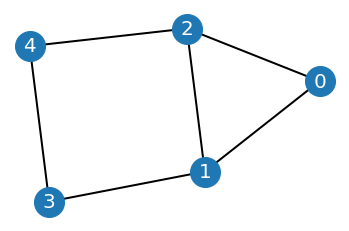

In [32]:
## obs: para executar essa célula é necessário antes executar células anteriores respectivas ao código

# Transformando a matriz de incidencia em lista de adjacencia para desenhar o grafo
grafo.matriz_de_incidencia_para_lista()

# Desenhando o grafo com networkx e matplotlib 
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph(grafo.lista_adjacencia)
pos = nx.spring_layout(G)
# Vertices
nx.draw_networkx_nodes(G, pos, node_size=900)
   
#Arestas
labels_arestas = {}
arestas = []
for i in grafo.lista_adjacencia:
    for j in grafo.lista_adjacencia[i]:
        if (j, i) not in labels_arestas:
            labels_arestas.update({(i,j) : str(grafo.lista_adjacencia[i][j])})
            arestas.append((i, j))
nx.draw_networkx_edges(G, pos, edgelist=arestas, width=2)
    
# Labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif', font_color='w')
plt.axis('off')
plt.show()

In [33]:
## obs: para executar essa célula é necessário antes executar células anteriores respectivas ao código
print(grafo.eh_vizinho(6, 9))

Algum ou ambos os vertices nao estao presentes no grafo
None


In [34]:
print("Vizinhos do 2:", grafo.retorna_vizinhos(2))

Vizinhos do 2: [0, 1, 4]


In [35]:
grafo.inserir_vertice(7)

Matriz apos adicionar o vertice 7: [[1, 1, 0, 0, 0, 0], [1, 0, 1, 1, 0, 0], [0, 1, 1, 0, 1, 0], [0, 0, 0, 1, 0, 1], [0, 0, 0, 0, 1, 1], [0, 0, 0, 0, 0, 0]] 



In [36]:
grafo.inserir_aresta(2, 7, 1)

Matriz de Incidencia ao adicionar aresta:  [[1, 1, 0, 0, 0, 0, 0], [1, 0, 1, 1, 0, 0, 0], [0, 1, 1, 0, 1, 0, 1], [0, 0, 0, 1, 0, 1, 0], [0, 0, 0, 0, 1, 1, 0], [0, 0, 0, 0, 0, 0, 1]] 



In [37]:
grafo.remover_vertice(4)

Matriz ao remover o vertice 4: [[1, 1, 0, 0, 0], [1, 0, 1, 1, 0], [0, 1, 1, 0, 1], [0, 0, 0, 1, 0], [0, 0, 0, 0, 1]] 



In [38]:
grafo.remover_aresta(2, 3)

a aresta (2, 3) nao existe no grafo
Matriz ao remover a arestas (u, v): [[1, 1, 0, 0, 0], [1, 0, 1, 1, 0], [0, 1, 1, 0, 1], [0, 0, 0, 1, 0], [0, 0, 0, 0, 1]] 



In [39]:
grafo.matriz_de_incidencia_para_matrizAdj()

Matriz de adjacencia:  [[0, 1, 1, 0, 0], [1, 0, 1, 1, 0], [1, 1, 0, 0, 1], [0, 1, 0, 0, 0], [0, 0, 1, 0, 0]] 



In [40]:
grafo.gerar_subgrafo_ind_vertices()

Numero de vertices:  5
Quantidade de vertices a remover:  5
Vertices a remover:  [1, 2, 0, 7, 3]
Matriz ao remover o vertice 1: [[1, 0], [1, 1], [0, 0], [0, 1]] 

Matriz ao remover o vertice 2: [[], [], []] 

Vertices presentes:  [0, 3, 7]
Matriz atualizada:  [[], [], []] 



In [41]:
grafo.gerar_subgrafo_ind_arestas()

Numero de arestas:  0
Quantidade de arestas a remover:  0
arestas a remover:  []
Matriz atualizada:  [[], [], []] 

